# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing
#### 6. Autocorrelations

# 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'bdTme2yK_o5ywKBMb7wA'

In [3]:
# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.

data = quandl.get('WASDE/DATA')

QuandlError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.

Using my project data for this task

In [4]:
path = r'/Users/user/Documents/Data analysis/E6 Dashboards/Data'

In [5]:
datalis = pd.read_csv(os.path.join(path, 'Cleaned data', 'listings_rev.csv'))

In [6]:
cal = pd.read_csv(os.path.join(path, 'Cleaned data', 'calendar_rev.csv'))

In [7]:
datalis.head()

,Unnamed: 0,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2818,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2.10,1,44
1,1,3209,3806,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,1.03,1,47
2,2,20168,59484,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2.18,2,198
3,3,25428,56142,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,0.09,2,141
4,4,27886,97647,Centrum-West,52.386727,4.892078,Private room,150,2,171,2.03,1,199


In [8]:
# Checking which properties were available for the full year
data = datalis[datalis['availability_365'] == 365]

In [9]:
data.head()

,Unnamed: 0,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
100,100,213721,599238,Zuid,52.351651,4.846533,Private room,129,3,39,0.45,1,365
298,298,543932,2303229,Westerpark,52.374718,4.872330,Entire home/apt,295,4,106,1.36,1,365
412,412,664697,1406783,Oud-Noord,52.385573,4.901371,Entire home/apt,87,30,64,0.85,1,365
527,527,768274,3678216,Centrum-West,52.386885,4.884892,Entire home/apt,225,3,57,0.89,1,365
669,669,916850,4922720,Noord-West,52.405095,4.903170,Entire home/apt,255,2,49,0.72,1,365


In [10]:
# Making a subset of a property that was available all year round (no empty values)
one = cal[cal['listing_id'] == 543932]

In [11]:
one.head(30)

,Unnamed: 0,listing_id,date,available,price
89636,89636,543932,2019-10-09,True,295.00
89637,89637,543932,2019-10-08,True,295.00
89638,89638,543932,2019-10-07,True,295.00
89639,89639,543932,2019-10-06,True,295.00
89640,89640,543932,2019-10-05,True,345.00
89641,89641,543932,2019-10-04,True,345.00
89642,89642,543932,2019-10-03,True,295.00
89643,89643,543932,2019-10-02,True,295.00
89644,89644,543932,2019-10-01,True,295.00
89645,89645,543932,2019-09-30,True,295.00


In [12]:
# Removing unnecesary columns
one_f = one.drop(columns = ['Unnamed: 0', 'listing_id', 'available'])

In [13]:
one_f.head()

,date,price
89636,2019-10-09,295.00
89637,2019-10-08,295.00
89638,2019-10-07,295.00
89639,2019-10-06,295.00
89640,2019-10-05,345.00


# 2. Subsetting, wrangling, and cleaning time-series data

In [14]:
# Changing data type into numeric one
one_f['price'] = one_f.price.astype(float)

In [15]:
# Set the "Date" column as the index

from datetime import datetime

one_f['datetime'] = pd.to_datetime(one_f['date']) # Create a datetime column from "Date.""
one_f = one_f.set_index('datetime') # Set the datetime as the index of the dataframe.
one_f.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
one_f.head()

,price
datetime,
2019-10-09,295.0
2019-10-08,295.0
2019-10-07,295.0
2019-10-06,295.0
2019-10-05,345.0


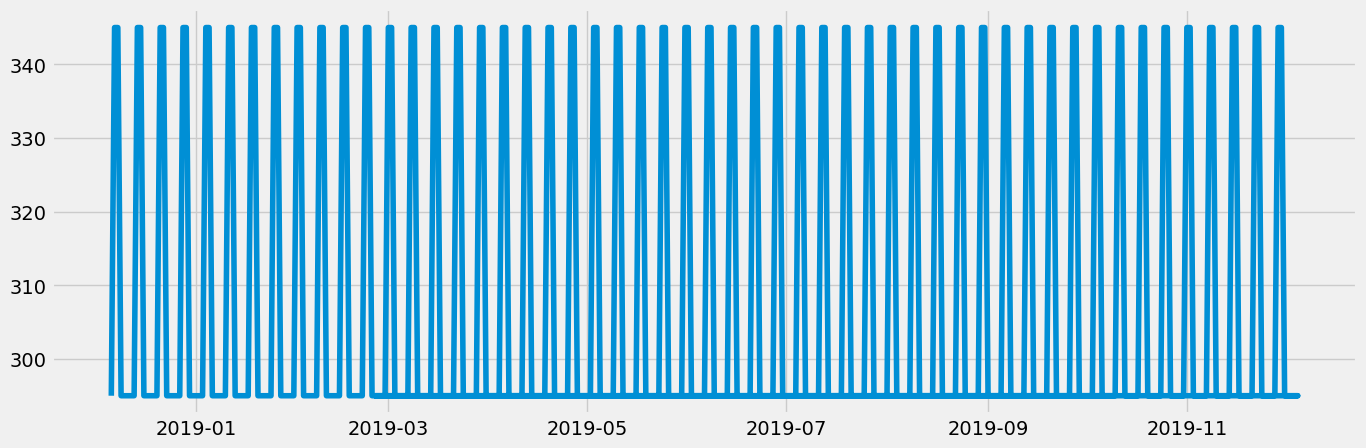

In [16]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(one_f)

In [17]:
one_f.isnull().sum()

price    0
dtype: int64

# 3. Time series analysis: decomposition

In [18]:
decomposition = sm.tsa.seasonal_decompose(one_f, model='additive', period = int(len(one_f)/2))

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

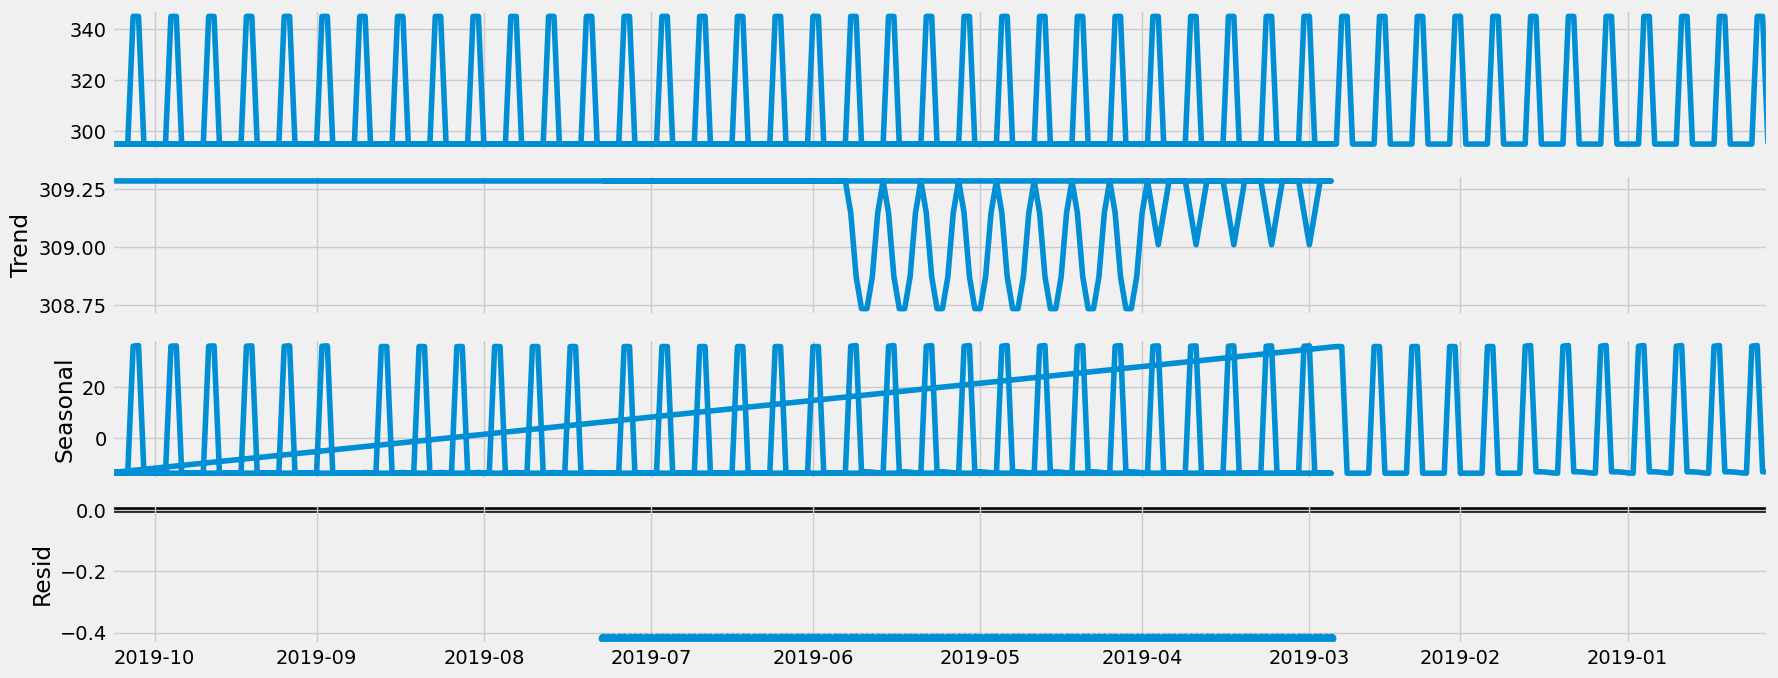

In [20]:
decomposition.plot()
plt.show()

This graph shows that there is a clear repetition in the price differences: five days a week the price is 295, whilst on the weekends it's 345. Two days of the week the price is increasing, which makes sense. From this graph I also can see the differences between cooler months and warmer months (March to August), which also makes sense.

# 4. Testing for stationarity

In [21]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(one_f['price'])

Dickey-Fuller Stationarity test:
Test Statistic                  -4.743646
p-value                          0.000070
Number of Lags Used             17.000000
Number of Observations Used    347.000000
Critical Value (1%)             -3.449337
Critical Value (5%)             -2.869906
Critical Value (10%)            -2.571227
dtype: float64


Since my test statistic (-4.74) is smaller than my 1% critical value (-3.44), I can confirm that this data is stationary as I am able to reject the null hypothesis.

# 5. Autocorrelations

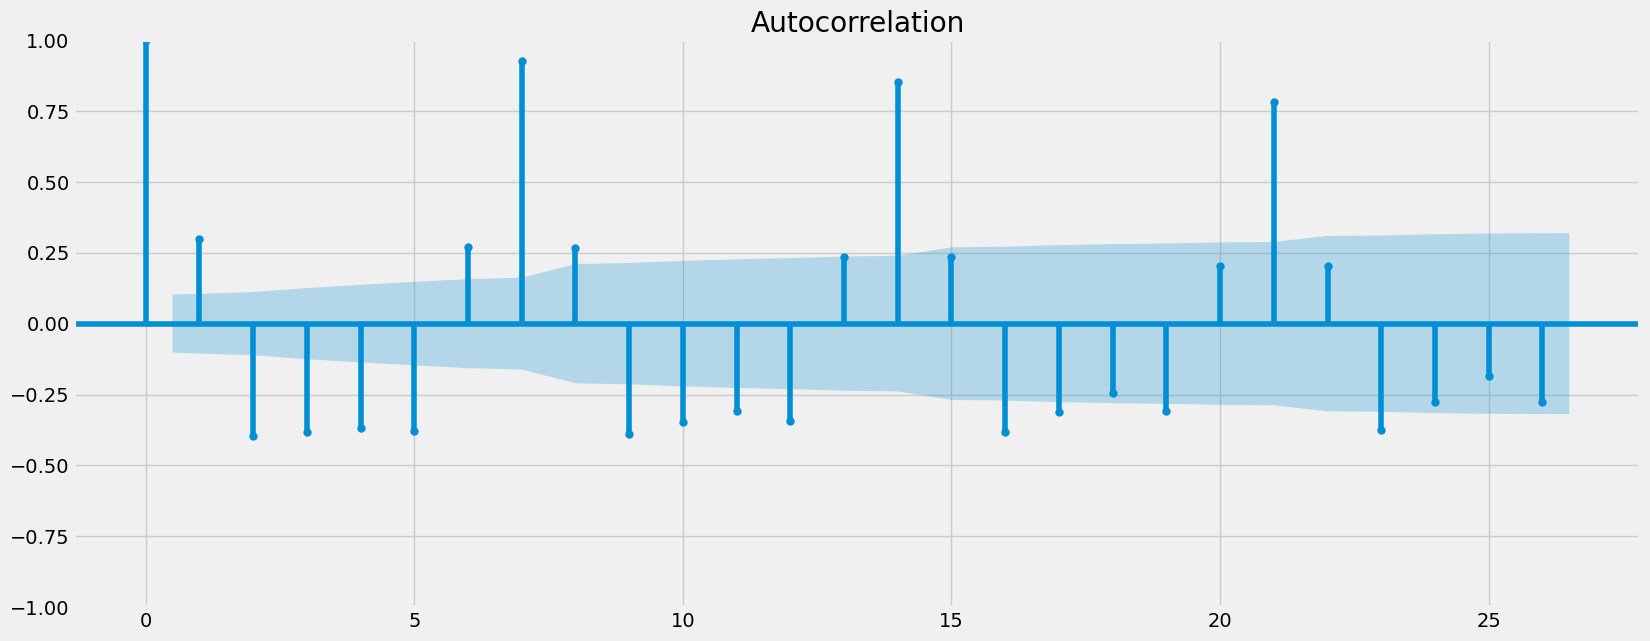

In [22]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(one_f)
plt.show()

From what I understand, many vertical lines outside the blue confidence interval incicates that there is some autocorrelated non-stationary data.

# 6. Stationarizing

Although, to my understanding, I do not need to stationirize this data, I want to make sure that I interpret things correctly. I will do the stationirizing procedure and hopefully will see even smaller test statistic and more lines inside the blue area.

In [23]:
data_diff = one_f - one_f.shift(1)

In [24]:
data_diff.dropna(inplace = True)

In [25]:
data_diff.head()

,price
datetime,
2019-10-08,0.0
2019-10-07,0.0
2019-10-06,0.0
2019-10-05,50.0
2019-10-04,0.0


In [26]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -8.346136e+00
p-value                        3.081886e-13
Number of Lags Used            1.700000e+01
Number of Observations Used    3.460000e+02
Critical Value (1%)           -3.449392e+00
Critical Value (5%)           -2.869930e+00
Critical Value (10%)          -2.571240e+00
dtype: float64


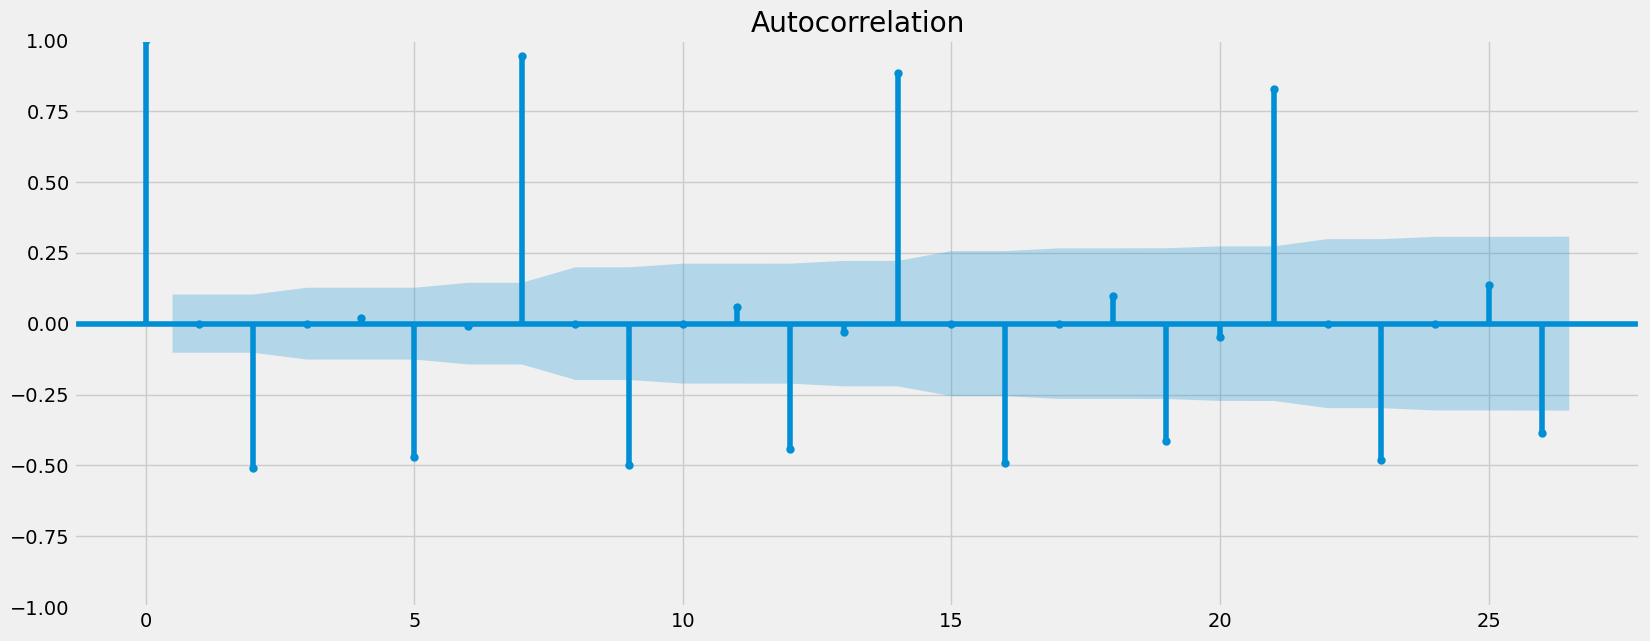

In [27]:
plot_acf(data_diff)
plt.show()

Test statistic became even smaller (-8) and the number of vertical lines decreased. To my understanding that means that data is even more stationary now.